<a href="https://colab.research.google.com/github/swastikcodes-at-git/my_files/blob/main/IDEAS_TIH_FASAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install statsmodels

In [ ]:
pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv("wheat_punjab.csv")
df.head()

,state,crop,season,year,area,production,yield
0,Punjab,Wheat,Rabi,1996-1997,3229000.0,13672000.0,4.23413
1,Punjab,Wheat,Rabi,1997-1998,3300000.0,12715000.0,3.85303
2,Punjab,Wheat,Rabi,1998-1999,3338000.0,14460000.0,4.33194
3,Punjab,Wheat,Rabi,1999-2000,3388000.0,15910000.0,4.69599
4,Punjab,Wheat,Rabi,2000-2001,3408000.0,15551000.0,4.56309


<Axes: >

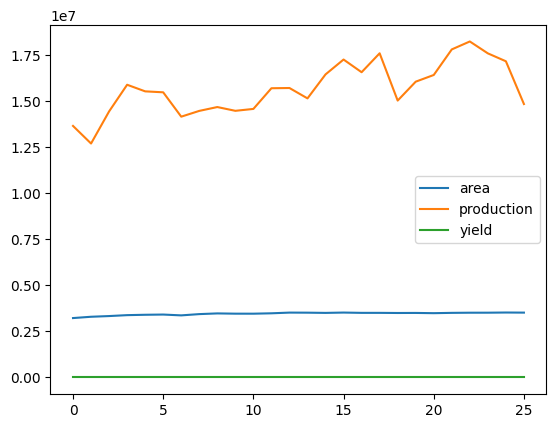

In [ ]:
df.plot()

In [ ]:
# Convert 'year' column to datetime format and set as index
df['year'] = df['year'].astype(str).str[:4]  # Extract starting year (e.g., "1996" from "1996-1997")
df['year'] = pd.to_datetime(df['year'])
df.set_index('year', inplace=True)

# Select the "production" column for time series analysis
ts = df['production']

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

# Check stationarity
check_stationarity(ts)

# If not stationary, perform differencing
ts_diff = ts.diff().dropna()

# Check stationarity after differencing
check_stationarity(ts_diff)


ADF Statistic: -2.3404739926624876
p-value: 0.15924626596666092
Critical Values: {'1%': np.float64(-3.7238633119999998), '5%': np.float64(-2.98648896), '10%': np.float64(-2.6328004)}
The data is not stationary.
ADF Statistic: -2.913853343326715
p-value: 0.043760596125609286
Critical Values: {'1%': np.float64(-3.8092091249999998), '5%': np.float64(-3.0216450000000004), '10%': np.float64(-2.6507125)}
The data is stationary.


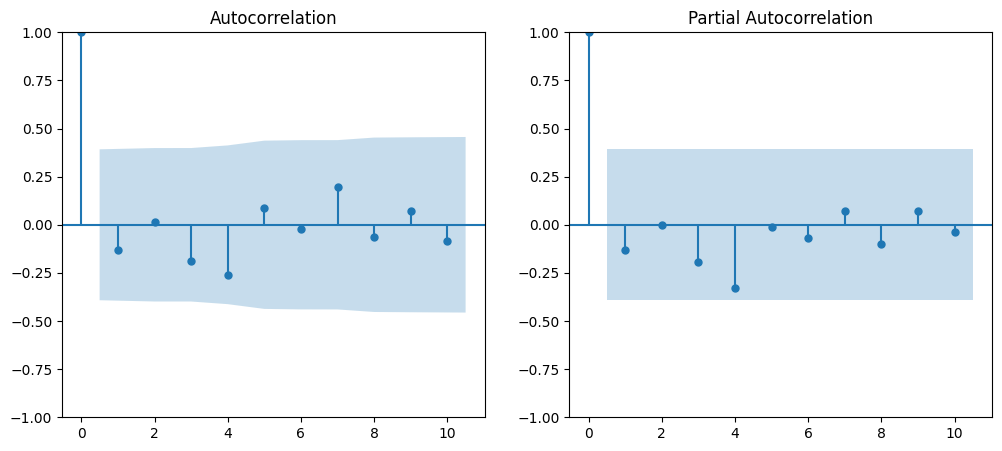

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -382.604
Date:                Fri, 04 Apr 2025   AIC                            771.207
Time:                        20:04:49   BIC                            774.864
Sample:                    01-01-1996   HQIC                           772.222
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9653      0.048    -20.147      0.000      -1.059      -0.871
ma.L1          0.9995      0.272      3.672      0.000       0.466       1.533
sigma2      1.061e+12   2.63e-13   4.04e+24      0.0

<ipython-input-32-dc123decf00a>:22: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



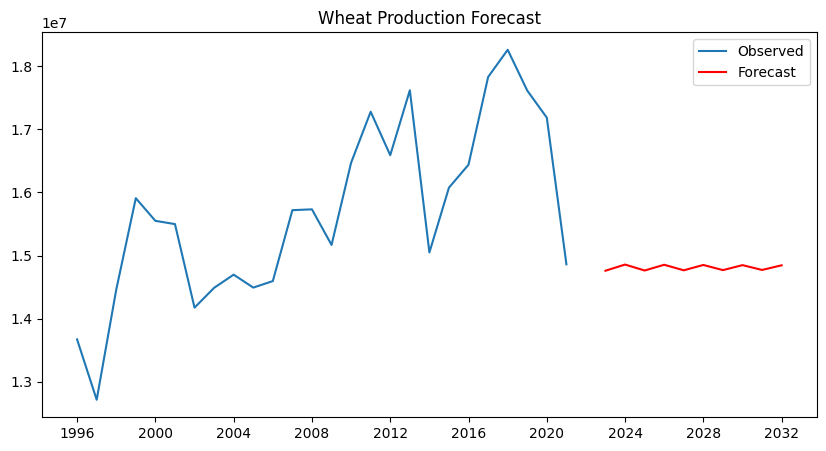

In [ ]:
# Plot ACF and PACF to determine AR and MA terms
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(ts_diff, lags=10, ax=plt.gca())
plt.subplot(122)
plot_pacf(ts_diff, lags=10, ax=plt.gca())
plt.show()

# Fit ARIMA model (set p, d, q based on ACF/PACF analysis)
p, d, q = 1, 1, 1  # Adjust these based on the plots
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Forecast for the next 10 years
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(ts, label="Observed")
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='Y')[1:], forecast, label="Forecast", color='red')
plt.legend()
plt.title("Wheat Production Forecast")
plt.show()